In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

In [2]:
currencies = ['EUR', 'USD', 'JPY', 'GBP']

In [3]:
def all_currencies_dataframe():
    file_path = 'all_currencies.xlsx'
    sheet_name = 'DNVALD'

    df_currencies = pd.read_excel(file_path, sheet_name=sheet_name, header=2, usecols='B:BBM')
    # print(df_currencies)

    dates = df_currencies.columns[1:].tolist()
    eur_values = df_currencies.iloc[0, 1:].tolist()
    usd_values = df_currencies.iloc[1, 1:].tolist()
    gbp_values = df_currencies.iloc[2, 1:].tolist()
    jpy_values = df_currencies.iloc[3, 1:].tolist()

    data = {
        'Date' : dates,
        'EUR' : eur_values,
        'USD' : usd_values,
        'GBP' : gbp_values,
        'JPY' : jpy_values
    }

    df_currencies_clean = pd.DataFrame(data)
    # print(df_currencies_clean)

    df_currencies_clean['Date'] = df_currencies_clean['Date'].str.replace(r'(\d{4})M(\d{2})D(\d{2})', r'\1-\2-\3', regex=True)
    df_currencies_clean['Date'] = pd.to_datetime(df_currencies_clean['Date'])
    # print(df_currencies_clean)

    df_currencies_clean = df_currencies_clean.replace('..', pd.NA).dropna()

    columns_to_cast = ['EUR', 'USD', 'GBP', 'JPY']
    df_currencies_clean[columns_to_cast] = df_currencies_clean[columns_to_cast].astype(float)
    # print(df_currencies_clean)

    return df_currencies_clean

In [4]:
def plot_currency_against_dkk(currency: str):

    main_df = all_currencies_dataframe()
    df = main_df[['Date',f'{currency}']]
    # print(df)
    df.plot(x='Date', y=[f'{currency}'])

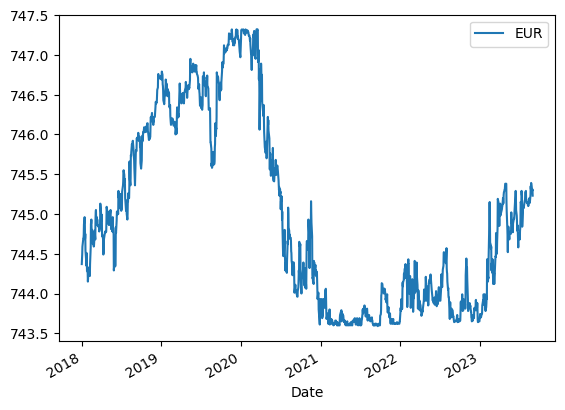

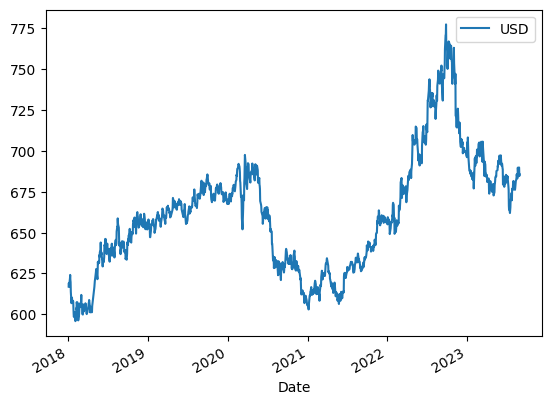

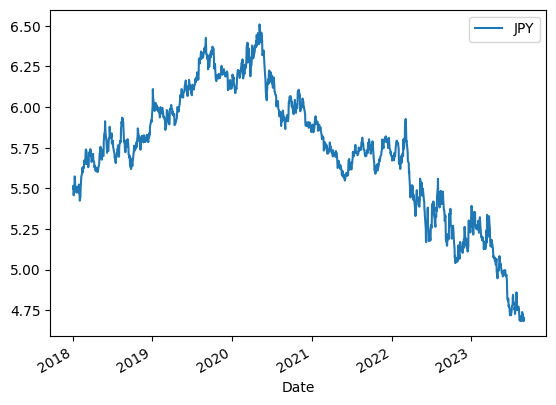

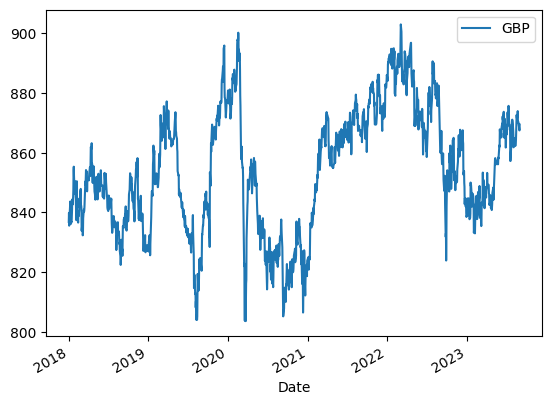

In [5]:
for currency in currencies:
    plot_currency_against_dkk(currency)

In [6]:
def plot_against_dkk_min_max(currency: str):
    
    df = all_currencies_dataframe()
    df2 = df[['Date',f'{currency}']]

    # Plot the DataFrame
    ax = df2.plot(x='Date', y=[f'{currency}'])

    # Calculate maximum and minimum values and their indices
    max_val = df2[f'{currency}'].max()
    max_idx = df2[f'{currency}'].idxmax()
    min_val = df2[f'{currency}'].min()
    min_idx = df2[f'{currency}'].idxmin()

    # Print the results
    print(f"Max val of {max_val:.3f} at date {max_idx}")
    print(f"Min val of {min_val:.3f} at date {min_idx}")

    # Add dotted lines for maximum and minimum values
    ax.axhline(max_val, color='red', linestyle='dotted', label=f'Max ({max_val:.3f})')
    ax.axhline(min_val, color='green', linestyle='dotted', label=f'Min ({min_val:.3f})')

    # Show the legend
    ax.legend()

Max val of 747.320 at date 471
Min val of 743.590 at date 924
Max val of 777.500 at date 1182
Min val of 595.810 at date 23
Max val of 6.508 at date 582
Min val of 4.683 at date 1406
Max val of 902.970 at date 1041
Min val of 803.550 at date 553


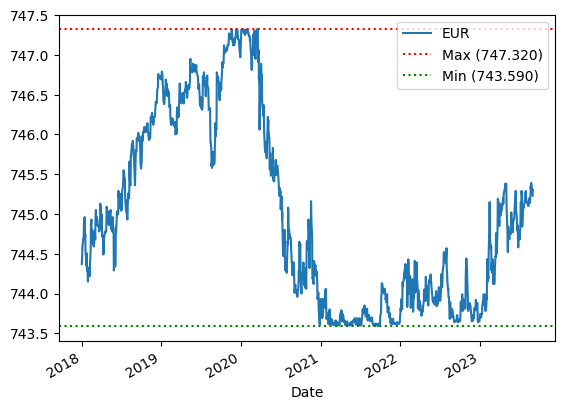

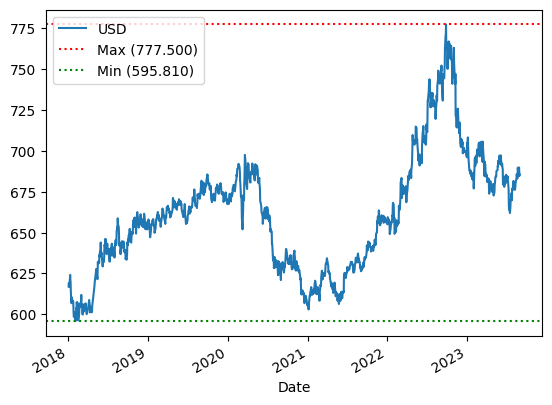

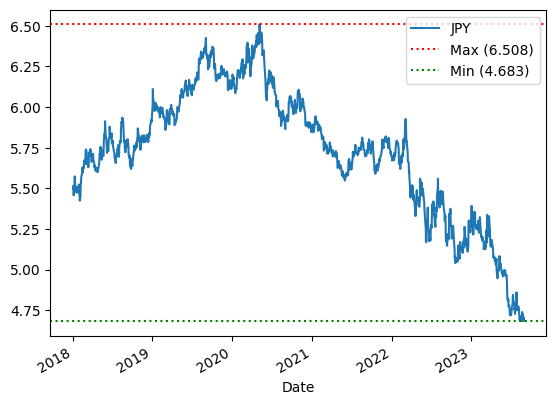

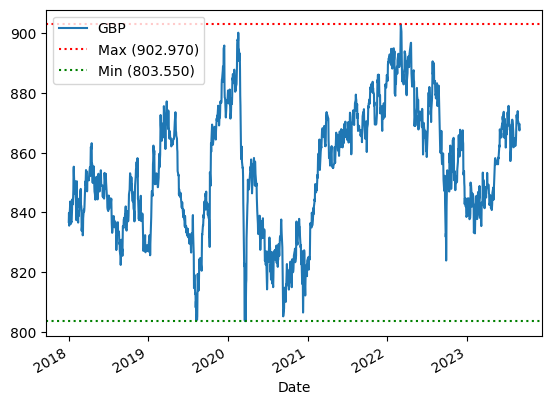

In [7]:
for currency in currencies:
    plot_against_dkk_min_max(currency)

In [8]:
def high_appreciation_depreciation_against_euro_in_a_day(currency: str):
    
    df = all_currencies_dataframe()
    df2 = df[['Date',f'{currency}']]
    df_new = df2.copy()

    df_new['diff'] = df2[f'{currency}'].diff(-1)
    df_new.plot(x= 'Date', y = ['diff']) 

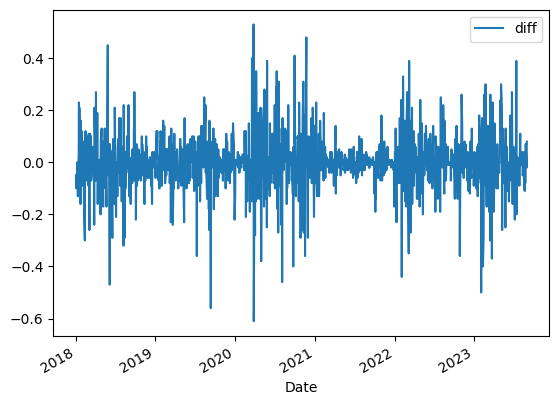

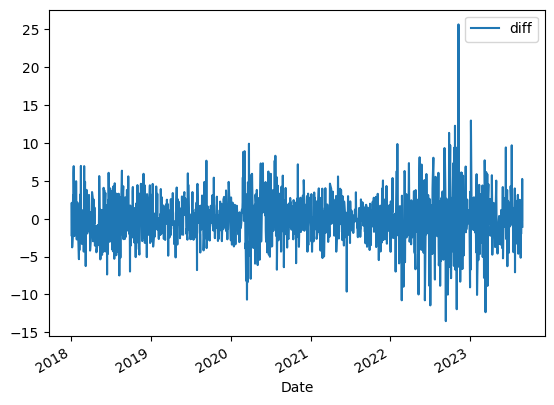

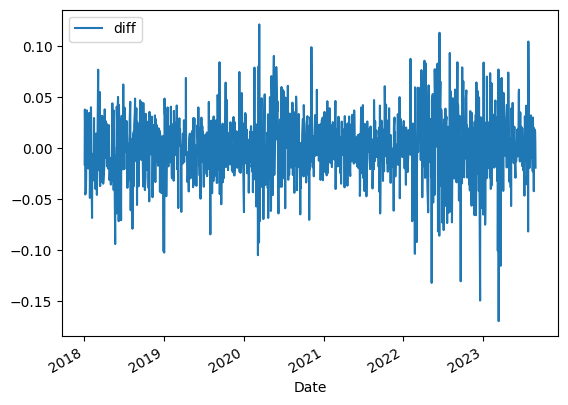

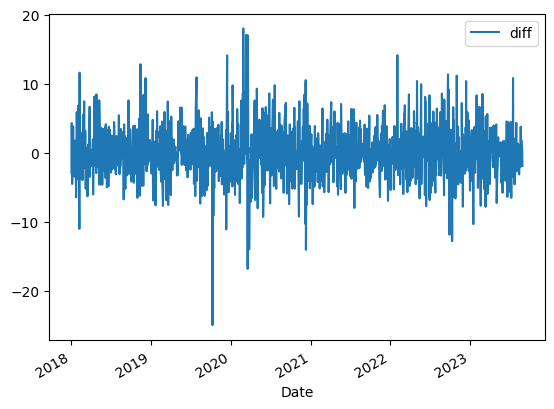

In [9]:
for currency in currencies:
    high_appreciation_depreciation_against_euro_in_a_day(currency)

In [10]:
def min_max_appreciation_depreciation_against_euro_in_a_day(currency: str):

    df = all_currencies_dataframe()
    df2 = df[['Date',f'{currency}']]
    df_new = df2.copy()
    df_new['diff'] = df2[f'{currency}'].diff(-1)


    max_date = df_new['Date'][df_new['diff'].idxmax()]
    min_date = df_new['Date'][df_new['diff'].idxmin()]

    # Create the plot
    ax = df_new.plot(x='Date', y=['diff'], legend=False)

    # Add markers for the max and min values
    ax.plot(max_date, df_new['diff'].max(), marker='o', markersize=8, label=f'Max ({max_date})', linestyle='', color='green')
    ax.plot(min_date, df_new['diff'].min(), marker='o', markersize=8, label=f'Min ({min_date})', linestyle='', color='red')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

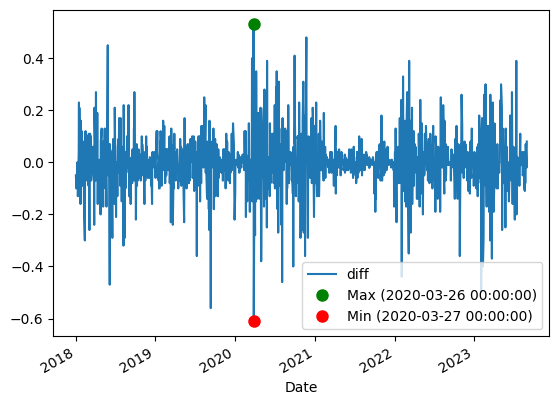

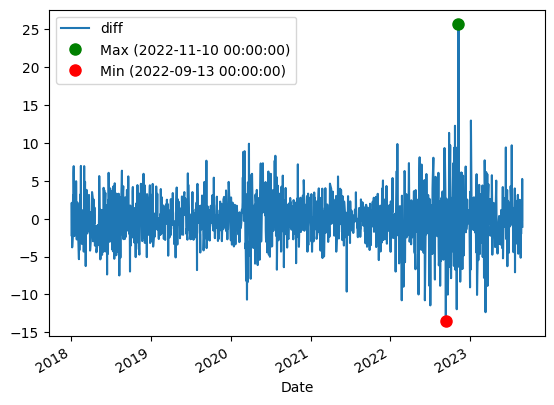

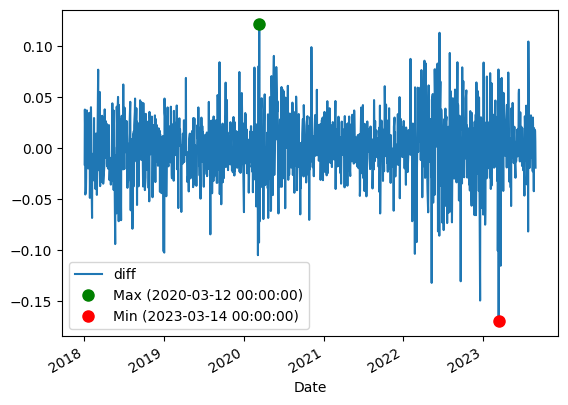

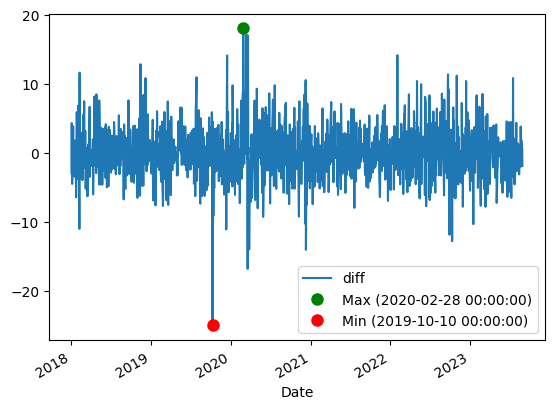

In [11]:
for currency in currencies:
    min_max_appreciation_depreciation_against_euro_in_a_day(currency)